In [3]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from wordcloud import WordCloud


nlp = spacy.load("en_core_web_sm")


df = pd.read_csv('fake_reviews_dataset.csv')


In [4]:
print(df.columns.tolist())

['category', 'rating', 'label', 'text_']


In [5]:
df.dropna(subset=['text_', 'category', 'label'], inplace=True)

In [6]:
def spacy_tokenizer(text):
   
    doc = nlp(text.lower())
    
    
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    return " ".join(tokens)


print("Processing text with spaCy.")
df['cleaned_text'] = df['text_'].apply(spacy_tokenizer)
print("Processing complete.")

Processing text with spaCy...
Processing complete.


In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['cleaned_text']).toarray()

input_dim = X_tfidf.shape[1]

Task 1

In [8]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
y_cat = tf.keras.utils.to_categorical(le_cat.fit_transform(df['category']))

model_cat = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(input_dim,)),
    

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    

    tf.keras.layers.Dense(y_cat.shape[1], activation='softmax')
])

model_cat.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cat.fit(X_tfidf, y_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7369 - loss: 0.7180 - val_accuracy: 0.0283 - val_loss: 10.5078
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8473 - loss: 0.4127 - val_accuracy: 0.0347 - val_loss: 12.5255
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.8949 - loss: 0.2929 - val_accuracy: 0.0386 - val_loss: 16.1958
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9311 - loss: 0.1919 - val_accuracy: 0.0382 - val_loss: 19.0375
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9594 - loss: 0.1160 - val_accuracy: 0.0385 - val_loss: 20.3830
Epoch 6/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9787 - loss: 0.0665 - val_accuracy: 0.0375 - val_loss: 23.6083
Epoch 7/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9863 - loss: 0.0427 - val_accuracy: 0.0359 - val_loss: 25.4118
Epoch 8/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0

253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Task 1: Product Category Performance Metrics
                              precision    recall  f1-score   support

                     Books_5       0.91      0.96      0.94       915
Clothing_Shoes_and_Jewelry_5       0.00      0.00      0.00       746
               Electronics_5       0.92      1.00      0.96       760
          Home_and_Kitchen_5       0.68      1.00      0.81       847
              Kindle_Store_5       0.95      1.00      0.97       971
             Movies_and_TV_5       0.90      1.00      0.95       735
              Pet_Supplies_5       0.87      1.00      0.93       867
       Sports_and_Outdoors_5       0.57      1.00      0.73       802
Tools_and_Home_Improvement_5       0.87      1.00      0.93       711
            Toys_and_Games_5       0.00      0.00      0.00       733

                    accuracy                           0.81      8087
                   macro avg       0.67      0.80      0.72      8087
  

c:\Users\JAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

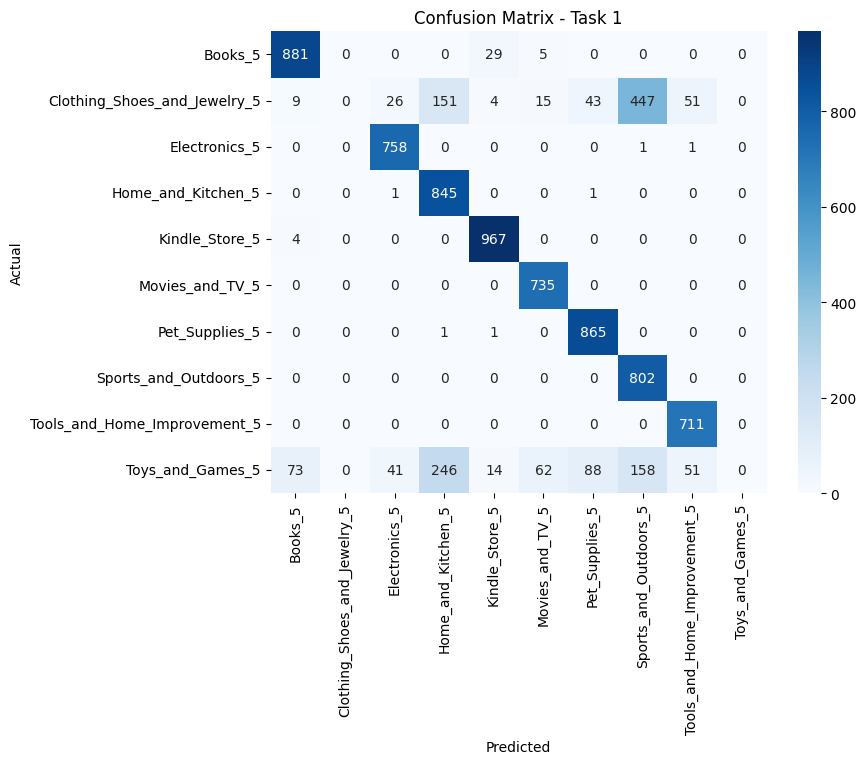

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_cat, test_size=0.2, random_state=42)

y_pred_probs = model_cat.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

y_true_classes = np.argmax(y_test, axis=1) 

print("Task 1: Product Category Performance Metrics")
print(classification_report(y_true_classes, y_pred_classes, target_names=le_cat.classes_))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_cat.classes_, 
            yticklabels=le_cat.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Task 1')
plt.show()

Task 2

In [11]:

le_label = LabelEncoder()
y_label = le_label.fit_transform(df['label'])

model_fake = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_fake.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_fake.fit(X_tfidf, y_label, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8424 - loss: 0.3496 - val_accuracy: 0.8009 - val_loss: 0.4091
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8980 - loss: 0.2307 - val_accuracy: 0.8019 - val_loss: 0.4463
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9396 - loss: 0.1475 - val_accuracy: 0.7961 - val_loss: 0.5499
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9716 - loss: 0.0729 - val_accuracy: 0.7874 - val_loss: 0.8947
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9886 - loss: 0.0325 - val_accuracy: 0.7753 - val_loss: 1.2124
Epoch 6/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.7789 - val_loss: 1.5759
Epoch 7/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9969 - loss: 0.0097 - val_accuracy: 0.7848 - val_loss: 1.5423
Epoch 8/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9976 -

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Task 2: Fake Review Detection Metrics
              precision    recall  f1-score   support

          CG       0.97      0.94      0.96      4016
          OR       0.94      0.98      0.96      4071

    accuracy                           0.96      8087
   macro avg       0.96      0.96      0.96      8087
weighted avg       0.96      0.96      0.96      8087



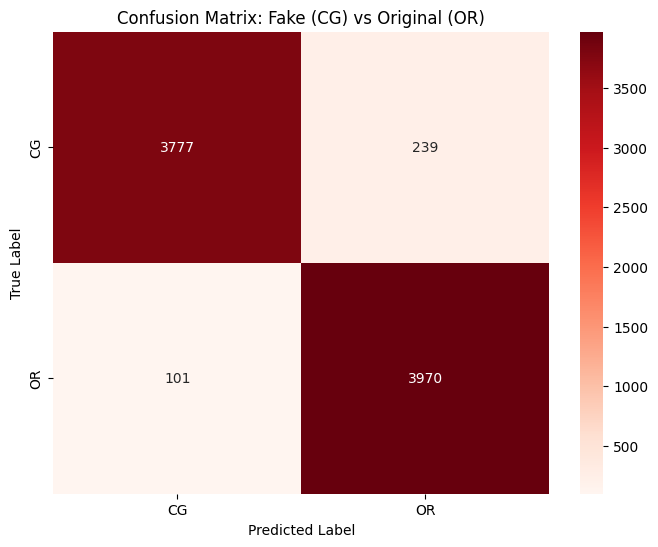

In [14]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_tfidf, y_label, test_size=0.2, random_state=42)

y_pred_probs_f = model_fake.predict(X_test_f)

y_pred_classes_f = (y_pred_probs_f > 0.5).astype("int32")

print("Task 2: Fake Review Detection Metrics")
print(classification_report(y_test_f, y_pred_classes_f, target_names=le_label.classes_))

cm_f = confusion_matrix(y_test_f, y_pred_classes_f)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_f, annot=True, fmt='d', cmap='Reds', 
            xticklabels=le_label.classes_, 
            yticklabels=le_label.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Fake (CG) vs Original (OR)')
plt.show()

Task 3

In [15]:
fake_reviews = df[df['label'] == 'CG']['text_']

fake_words_list = []
for doc in nlp.pipe(fake_reviews.str.lower(), batch_size=50):
    for token in doc:
        if token.pos_ in ['ADJ', 'NOUN'] and not token.is_stop and not token.is_punct:
            fake_words_list.append(token.lemma_)
fake_text_combined = " ".join(fake_words_list)

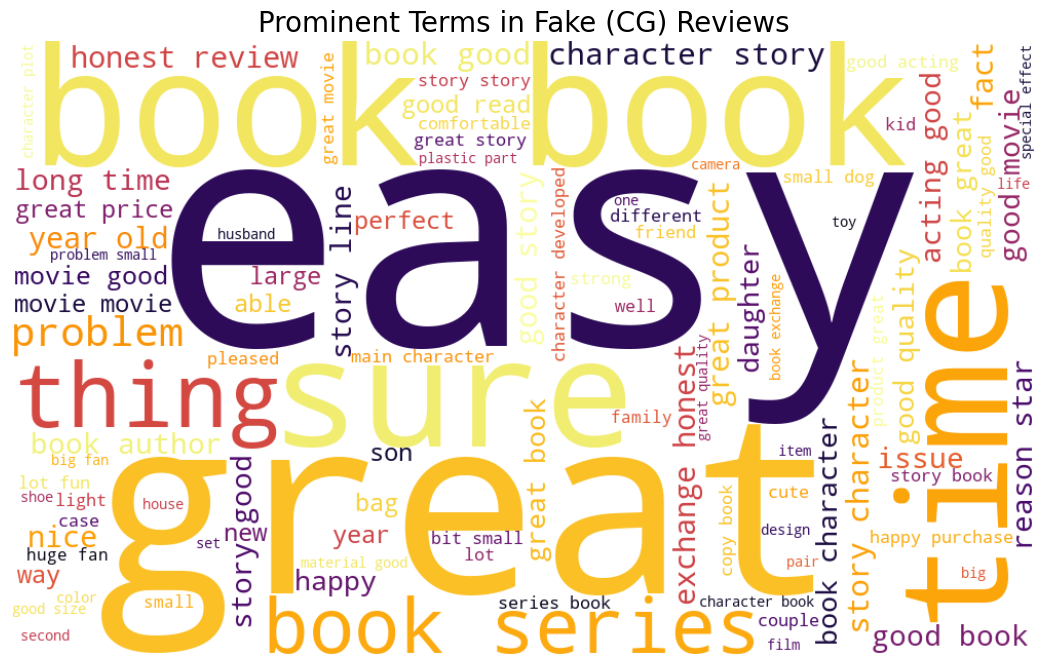

In [16]:
wordcloud = WordCloud(
    width=1000, 
    height=600, 
    background_color='white', 
    colormap='inferno', 
    max_words=100
).generate(fake_text_combined)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Prominent Terms in Fake (CG) Reviews", fontsize=20)
plt.show()